In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2


In [2]:
# Chargement du dataset EMNIST Letters
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

In [3]:
def preprocess(image, label):
    image = tf.ensure_shape(image, [28, 28, 1])  # assurer que les images ont un shape (28, 28, 1)
    image = tf.squeeze(image, axis=-1)  # remplacement de canale dimension (28x28x1 -> 28x28)
    image = tf.cast(image, tf.float32) / 255.0  # normalisation de l'image
    label = tf.cast(label, tf.int32)  # assuer que le label est un integer
    label = tf.one_hot(label, depth=62)  # One-hot encode the label
    return image, label

In [4]:
# Prepare the training and testing datasets
batch_size = 64
ds_train = ds_train.map(preprocess).shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [8]:
for image, label in ds_train.take(1):
    print(f"Image shape: {image.shape}, Label shape: {label.shape}")

Image shape: (64, 28, 28), Label shape: (64, 62)


In [5]:
# Création du modèle LSTM
model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(28, 28)),  # Chaque ligne est une étape temporelle
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)), #  L2 regularization pour overfitting
    Dense(62, activation='softmax')  # 26 classes pour les lettres A-Z
])

#hybride archtitect
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     LSTM(128, return_sequences=False),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dense(26, activation='softmax')
# ])

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 62)                  │           4,030 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,182 (363.99 KB)

 Trainable params: 92,926 (362.99 KB)

 Non-trainable params: 256 (1.00 KB)

In [10]:
# Entraînement
# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)
# Entraînement
history = model.fit(ds_train, validation_data=ds_test, epochs=15)

Epoch 1/15
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 354s 32ms/step - accuracy: 0.7411 - loss: 1.0396 - val_accuracy: 0.8400 - val_loss: 0.4900
Epoch 2/15
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 361s 33ms/step - accuracy: 0.8376 - loss: 0.5013 - val_accuracy: 0.8478 - val_loss: 0.4602
Epoch 3/15
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 364s 33ms/step - accuracy: 0.8475 - loss: 0.4648 - val_accuracy: 0.8556 - val_loss: 0.4357
Epoch 4/15
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 376s 34ms/step - accuracy: 0.8527 - loss: 0.4453 - val_accuracy: 0.8552 - val_loss: 0.4334
Epoch 5/15
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 367s 34ms/step - accuracy: 0.8564 - loss: 0.4323 - val_accuracy: 0.8577 - val_loss: 0.4266
Epoch 6/15
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 372s 34ms/step - accuracy: 0.8585 - loss: 0.4232 - val_accuracy: 0.8574 - val_loss: 0.4261
Epoch 7/15
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 361s 33ms/step - accuracy: 0.8607 - loss: 0.4154 - val_accuracy: 0.8598 - val_loss: 0.4140
Epoch 8/15
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 363s 33ms/s

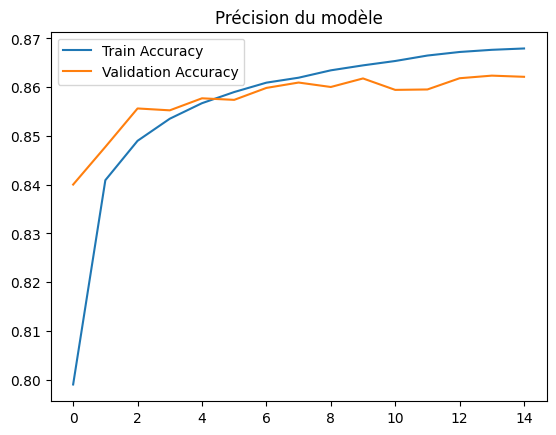

In [11]:
# Visualisation des résultats
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Précision du modèle')
plt.show()

In [12]:
# Évaluation
loss, accuracy = model.evaluate(ds_test)
print(f"Précision du modèle sur les lettres : {accuracy*100:.2f}%")

1818/1818 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.8624 - loss: 0.4063
Précision du modèle sur les lettres : 86.21%


In [13]:
model.save('./modele_Version_Finale4.keras')